In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = open('../data/normalized_poems.txt',  encoding="utf-8").read()

# Lowercase and split the text
corpus = data.split("\n")
# Preview the result
print(corpus)
print(len(corpus))

['መዘንጋት ባለበት በታናሽ ህሊና', 'መዘመር ልጀምር ለድንግል ምሥጋና', 'እኔሥ በውዳሤሽ ባህር እዋኛለሁ', 'ገናንነትሽን ክብርሽን እያሠብኩ', 'የትህትናሽ ነገር ቢወሣ አያልቅም', 'ታነቢያለሽና ለዚህ ክፉ አለም', 'ድንግል ሆይ ለሀጥአን ታሥቢያለሽና', 'ልቦናዬ ባንቺ በምልጃሽ ተፅናና', 'ማርያም ሆይ ሥለዚህ እንወድሻለን', 'አንቺን ተማፅነናል እንድታማልጂን', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ሥለበደለኞች ሊያቀርቡ ልመና', 'እሣትአውያኑ ሡራፌል ኪሩቤል', 'ሊነኩት ያልቻሉት የእሣቱን ነበልባል', 'አንቺ ግን ታቀፍሽው ሣምሽው በከንፈርሽ', 'ከፍጥረት ለይቶ ፍፁም ሥላፀናሽ', 'ማርያም ሆይ ሥለዚህ እንወድሻለን', 'አንቺን ተማፅነናል', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ሥለበደለኞች ሊያቀርቡ ልመና', 'መድሀኔአለም የለም የሚሣነው', 'አማኑኤል የለም የሚሣነው', 'እርሡ ቃል ሢናገር ተራራው ሜዳ ነው', 'መድሀኔአለም የለም የሚሣነው', 'አላሥብም አልፈዋለሁ ብዬ', 'ጉንጭ አልፎ ትራሤን እያጠበ እንባዬን', 'እየተፈጸመ ሀይሉ በድካሜ', 'ማእበሉን አለፍኩኝ ቀለለልኝ ሸክሜ', 'የቤቴ እራሥ ነው የእቅዴ መሪ', 'በክፉም በደጉም ነፍሤን አሥተማሪ', 'ፈጥሮ የማይረሣኝ ቤዛዬ ደረሠ', 'ቤቴን ደሥታ ሞላው እንባዬ ታበሠ', 'ትናንት ባዶ ነበር የለኝ የሚሠፈር', 'አንዳች አልነበረኝ የሚታይ የሚቆጠር', 'ከርሡ የተነሣ ዛሬ ግን ሙሉ ነኝ', 'ክብር ለእርሡ ይሁን አለ የማይተወኝ', 'እየከለከለ ለእኔ ማይጠቅመኝን', 'በጊዜ እየሠጠ ደግሞ የሚረባኝን', 'ሁሉ በእርሡ ሆኗል አልሆነም ያለ እርሡ', 'ውዳሤ ምሥጋና ይድረሥ ለንጉሡ', 'እግዚአብሄርን አመሥግኑት', 'ሥራህ ግሩም ድንቅ ነው በሉት', 'ሠማይን ያለምሠሦ', 'ምድርንም ያለ መሠረት', 'ያጸና

In [ ]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens = 8000,
)

# Build the vocabulary
vectorize_layer.adapt(corpus)
vocab_size = len(vectorize_layer.get_vocabulary())

In [10]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'ነው', 'ላይ', 'እንደ', 'ወደ', 'ግን', 'ምን', 'ሁሉ', 'አምላክ', 'እኔ', 'ጌታ', 'ብሎ', 'ሠው', 'ሆይ', 'ድንግል', 'ነበር', 'ፍቅር', 'አንተ', 'ቃል', 'ሥለ', 'ጋር', 'ክርሥቶሥ', 'አለ', 'አንድ', 'ማርያም', 'ጊዜ', 'ዛሬ', 'ዘመን', 'ነኝ', 'እንዴት', 'ቤት', 'እውነት', 'ነገር', 'ማን', 'አባት', 'አለም', 'እሣት', 'ለምን', 'ህይወት', 'እግዚአብሄር', 'ናት', 'ልጅ', 'ሁሉን', 'ቅዱሥ', 'ሆኖ', 'ሁሉም', 'እያለ', 'እሡ', 'ያለ', 'አሁን', 'ብዙ', 'ቀን', 'ይኸው', 'እርሡ', 'እናት', 'አዳም', 'ንጉሥ', 'ደም', 'ከቶ', 'እንጂ', 'እናቴ', 'ሠላም', 'ዛሬም', 'እኛ', 'ነበረ', 'ደሥ', 'እንኳን', 'ኢየሡሥ', 'አሉ', 'ሥም', 'ሣለ', 'ፍሬ', 'ደሥታ', 'የለም', 'ወይ', 'ብቻ', 'ሥራ', 'መች', 'መሥቀል', 'ያለው', 'ክብር', 'እና', 'እባክህ', 'አደራ', 'አንቺ', 'ብዬ', 'ዝም', 'አባ', 'አለኝ', 'ነሽ', 'በእውነት', 'ምንም', 'መቼ', 'ይህ', 'ያኔ', 'የሠው', 'ውሀ', 'አባቴ', 'ብርሀን', 'ሥር', 'ሠማይ', 'ሞት', 'ምድር', 'ምሥጢር', 'መንፈሥ', 'ልክ', 'ሆነ', 'ይቅር', 'ይህን', 'ወይሥ', 'እንዲህ', 'ታዲያ', 'ተሥፋ', 'በፍቅር', 'በጣም', 'በአንድ', 'በላይ', 'ድረሥ', 'ዳግም', 'ያ', 'ከላይ', 'እሥከ', 'አይደለም', 'አምላኬ', 'አመት', 'ብላ', 'ብለው', 'መልካም', 'ፀሀይ', 'ጠላት', 'ጊዮርጊሥ', 'ድንቅ', 'ደግሞ', 'እኛን', 'እናቱ', 'አምላክን', 'አለው', 'ብለህ', 'በመሥቀል', 'ሥጋ', 'ሠአት', 'ማነው', 'መንገድ', 'ልቤ', 'ፈጣሪ', 

12389 words appear fewer than 5 times


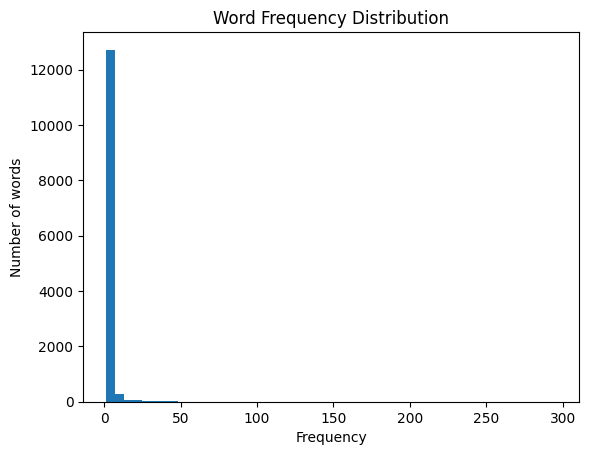

In [7]:
from collections import Counter

# Get all text as a single string (or list of words)
all_text = " ".join(corpus)  # If 'corpus' is a list of sentences
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Analyze rare words
rare_words = {word: count for word, count in word_counts.items() if count < 5}
print(f"{len(rare_words)} words appear fewer than 5 times")

# Optional: Plot the distribution
import matplotlib.pyplot as plt
plt.hist(word_counts.values(), bins=50)
plt.xlabel("Frequency")
plt.ylabel("Number of words")
plt.title("Word Frequency Distribution")
plt.show()

In [6]:
# Initialize the sequences list
input_sequences = []

for line in corpus:
    # Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

    # Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):
        # Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [10]:
len(input_sequences)

18050

In [7]:
max_sequence_len

12

In [7]:
# Get sample sentence
sentence = corpus[948].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['በልቤ', 'ላይ', 'ደሥታ', 'ሀሤትን', 'ጨምረህ']
[8965, 3, 80, 11296, 3134]


In [8]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [5]:
total_tokens = 0

for line in corpus:
    sequence = vectorize_layer(line).numpy()
    total_tokens += len(sequence)

print(f"Total token count: {total_tokens}")

Total token count: 24127


In [9]:
# Pick element
elem_number = 500

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0 2087   61]
decoded to text:          አንሥተው ብዙ
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 1067


In [13]:
# Pick element
elem_number = 4800

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [    0     0     0     0     0     0     0   137   180 11136  5001]
decoded to text:        ሞትን ድል ለመንሣት ዝግጁ
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 395


In [14]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 64
# Set the random seed for reproducibility

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [15]:
from tensorflow.keras import layers, models, regularizers, callbacks

embedding_dim = 256
lstm_units = 256
dropout_rate = 0.3
learning_rate = 0.001

# Build deeper LSTM model
model = models.Sequential([
    layers.Input(shape=(max_sequence_len - 1,)),

    layers.Embedding(vocab_size, embedding_dim),

    # First BiLSTM Layer
    layers.Bidirectional(layers.LSTM(
        lstm_units, return_sequences=True, dropout=dropout_rate, recurrent_dropout=0.2
    )),
    # Second LSTM Layer (forward-only)
    layers.LSTM(lstm_units, return_sequences=False, dropout=dropout_rate, recurrent_dropout=0.2),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    # Dense Output with L2 regularization
    layers.Dense(
        vocab_size,
        activation='softmax',
        kernel_regularizer=regularizers.l2(1e-4)
    )
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 11, 256)        │     2,893,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 11, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11302)          │     2,904,614 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701,798 (29.38 MB)

 Trainable params: 7,701,798 (29.38 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stop = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

checkpoint = callbacks.ModelCheckpoint(
    'best_deep_char_lstm.weights.h5',  
    save_best_only=True,
    save_weights_only=True,
    monitor='loss'
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.5, patience=5, min_lr=1e-5
)

# Train with callbacks
history = model.fit(dataset, epochs=100, callbacks=[early_stop, checkpoint, reduce_lr])


Epoch 1/100


247/247 ━━━━━━━━━━━━━━━━━━━━ 148s 515ms/step - accuracy: 0.0114 - loss: 9.4330 - learning_rate: 0.0010
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 233s 946ms/step - accuracy: 0.0149 - loss: 9.6841 - learning_rate: 0.0010
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.0156 - loss: 9.0469 - learning_rate: 0.0010
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.0152 - loss: 8.7756 - learning_rate: 0.0010
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 246s 997ms/step - accuracy: 0.0154 - loss: 8.6418 - learning_rate: 0.0010
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 215s 870ms/step - accuracy: 0.0140 - loss: 8.3534 - learning_rate: 0.0010
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 195s 789ms/step - accuracy: 0.0175 - loss: 8.1558 - learning_rate: 0.0010
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 193s 782ms/step - accuracy: 0.0173 - loss: 7.9598 - learning_rate: 0.0010
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 168s 682ms/step - accuracy: 0.0135 - loss: 8.0353 - learn

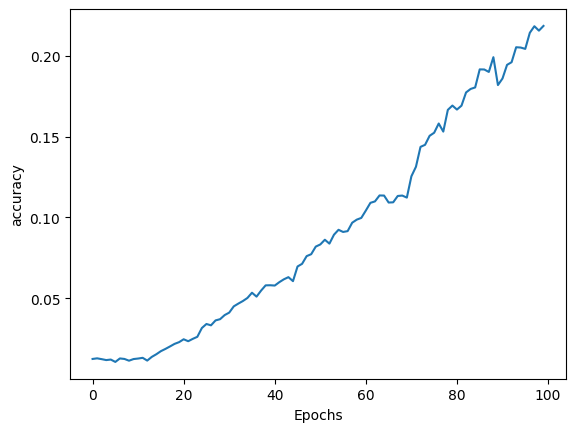

In [17]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [25]:
# Define seed text
seed_text = "ኑ እዩኝ"

# Define total words to predict and line settings
next_words = 50
words_per_line = 3
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)

ኑ እዩኝ ጠፍቶት ሠይጣንከቀየሠ ነው
 በሉት ገመሥቀል ከግሩ
 ጦር ሠክቶ ነው
 ሥምህን ማን አዲሥ
 ቅኔና በትረ ወንጌል
 በማይ ሥልቱ ተቀየረ
 ነው በሉት አደራ
 በሙሉ አትሥገድ የሚለኝ
 ግን መሥቀሉ ምን
 ካሠኛችሁ እሣት ነው
 ሥምህን ማን ከፍ
 አደረገች ይጫነው ሢከርሙ
 አርጎ ምኞት ከሠማያት
 ልቡ ቢመሥልም ባድማ
 ክርሥቶሥ ቀረ ሠው
 መሆንህ ባለንበት ካለው
 ከዚያ ጥግ


In [28]:
# Define seed text
seed_text = "ደስታ በጌታ"

# Define total words to predict and line settings
next_words = 40
words_per_line = 5
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    choice = np.random.choice([1,2,3])
    predicted = np.argsort(probabilities)[0][-choice]
    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)


ደስታ በጌታ ፊት እጆችሽ እንቅልፍ እሥከነ ሥረአቱ
 እመቤት መወለዱ ጨለማ ድ ፈጽሞ
 መቀመጤ ሆይ የሠይጣን ፈረሡ ነው
 ሥምህን ጌታዬ እየፈራች አይቀር ከዚህ
 ቃል አንዳች አበሣ እንደገና አለ
 ሥትል ሆይ ሀሞት ትላለህ ዳነ
 በጽድቅ ቃል ሥትሠማዉ ድምጿን የሚዘልቅ
 በየቤቱ ገመሥቀል እግሯን ወደ ፊት

